<center>
# МОДУЛЬ 2. ПОСТРОЕНИЕ ДЕРЕВЬЕВ РЕШЕНИЙ CHAID С ПОМОЩЬЮ ПАКЕТА R CHAID

# Лекция 2.1 Знакомство с методом CHAID

## 2.1.1 Описание алгоритма

## 2.1.2 Немного о тесте хи-квадрат

## 2.1.3 Способы объединения категорий предикторов

## 2.1.4 Поправка Бонферрони

## 2.1.5 Иллюстрация работы CHAID на конкретном примере

# Лекция 2.2 Предварительная подготовка данных перед построением  модели дерева CHAID

## 2.2.1 Загрузка данных

In [1]:
# для работы с программным кодом R в Jupiter,
# запустите Anaconda Prompt и установите 
# пакет r-essentials с помощью строки 
# conda install r-essentials

# считываем CSV-файл в датафрейм data
data <- read.csv2("C:/Trees/Churn.csv", sep=";")

## 2.2.2 Фиксация пустых строковых значений как пропусков

In [2]:
# смотрим первые 10 наблюдений 
# датафрейма data
head(data, 10)

longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,1
,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,1
<2,<8,Нет,,CC,Мужской,Женат,NA,,1
<2,<8,,Бесплатный,CH,Мужской,Одинокий,NA,<31,0
<2,,Нет,Бесплатный,Auto,,Одинокий,16829.6,<31,1
,<8,Нет,Бесплатный,,Женский,Одинокий,57272.7,<31,1
,<8,Нет,Бюджетный,,Мужской,Женат,NA,<31,1
<2,<8,Нет,Бесплатный,Auto,Мужской,,NA,<31,1
<2,<8,Да,,CH,Мужской,Одинокий,92167.3,<31,1
<2,<8,Нет,Бесплатный,CC,Мужской,Женат,37135.5,<31,1


In [3]:
# выводим количество пропусков
# по переменной income 
sum(is.na(data$income))

[1] 4

In [4]:
# выводим количество пропусков
# по переменной pay 
sum(is.na(data$pay))

[1] 0

In [5]:
# помечаем пустые строковые
# значения как пропуски 
is.na(data) <- data==''

In [6]:
# выводим первые 10 наблюдений
# датафрейма data 
head(data, 10)

longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.0,<31,1
NA,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.5,<31,1
<2,<8,Нет,NA,CC,Мужской,Женат,NA,NA,1
<2,<8,NA,Бесплатный,CH,Мужской,Одинокий,NA,<31,0
<2,NA,Нет,Бесплатный,Auto,NA,Одинокий,16829.6,<31,1
NA,<8,Нет,Бесплатный,NA,Женский,Одинокий,57272.7,<31,1
NA,<8,Нет,Бюджетный,NA,Мужской,Женат,NA,<31,1
<2,<8,Нет,Бесплатный,Auto,Мужской,NA,NA,<31,1
<2,<8,Да,NA,CH,Мужской,Одинокий,92167.3,<31,1
<2,<8,Нет,Бесплатный,CC,Мужской,Женат,37135.5,<31,1


In [7]:
# выводим количество пропусков
# по переменной pay 
sum(is.na(data$pay))

[1] 2

In [8]:
# фиксируем пустые строковые
# значения как пропуски 
data <- read.csv2("C:/Trees/Churn.csv", sep=";", na.strings="")

## 2.2.3 Изменение типов переменных

In [9]:
# смотрим типы переменных
str(data)

'data.frame':	4431 obs. of  10 variables:
 $ longdist: Factor w/ 5 levels "<2","15-20","2-8",..: 1 NA 1 1 1 NA NA 1 1 1 ...
 $ local   : Factor w/ 5 levels "<8","21-35","36-55",..: 1 1 1 1 NA 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 NA 2 2 2 2 1 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 NA 1 1 1 2 1 NA 1 ...
 $ pay     : Factor w/ 4 levels "Auto","CC","CD",..: 2 2 2 4 1 NA NA 1 4 2 ...
 $ gender  : Factor w/ 4 levels "Женский","Женский&*",..: 3 3 3 3 NA 1 3 3 3 3 ...
 $ marital : Factor w/ 5 levels "_Женат","_Одинокий",..: 4 4 4 5 5 5 4 NA 5 4 ...
 $ income  : num  77680 37112 NA NA 16830 ...
 $ agecat  : Factor w/ 5 levels "<31","31-45",..: 1 1 NA 1 1 1 1 1 1 1 ...
 $ churn   : int  1 1 1 0 1 1 1 1 1 1 ...


In [10]:
# преобразовываем переменную
# churn в вектор типа factor 
data$churn <- as.factor(data$churn)

In [11]:
# преобразовываем переменные longdist, local,
# agecat в вектор типа ordered factor 
data$longdist <- ordered(data$longdist, 
                         levels = c("<2", "2-8", "9-14", "15-20", "21+"))
data$local <- ordered(data$local, 
                      levels = c("<8", "8-20", "21-35", "36-55", "56+"))
data$agecat <- ordered(data$agecat, 
                       levels = c("<31", "31-45", "46-58", "59-70", "71+"))


In [12]:
# загружаем пакет dplyr 
library(dplyr)
# c помощью функции recode пакета dplyr
# переименовываем категории переменной marital_status
data$churn <- recode(data$churn, "0"="Остается", "1"="Уходит")

Warning message:
"package 'dplyr' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
# отсоединяем пакет dplyr 
detach("package:dplyr", unload=TRUE)

In [14]:
# смотрим типы переменных 
str(data)

'data.frame':	4431 obs. of  10 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 NA 1 1 1 NA NA 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 1 NA 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 NA 2 2 2 2 1 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 NA 1 1 1 2 1 NA 1 ...
 $ pay     : Factor w/ 4 levels "Auto","CC","CD",..: 2 2 2 4 1 NA NA 1 4 2 ...
 $ gender  : Factor w/ 4 levels "Женский","Женский&*",..: 3 3 3 3 NA 1 3 3 3 3 ...
 $ marital : Factor w/ 5 levels "_Женат","_Одинокий",..: 4 4 4 5 5 5 4 NA 5 4 ...
 $ income  : num  77680 37112 NA NA 16830 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: 1 1 NA 1 1 1 1 1 1 1 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 2 1 2 2 2 2 2 2 ...


## 2.2.4 Обработка дублирующихся наблюдений

In [15]:
# смотрим дублирующиеся наблюдения 
data[duplicated(data),]

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
358,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Уходит
461,<2,<8,Да,Бесплатный,CC,Женский&*,_Одинокий,18831.1,46-58,Уходит
2060,21+,21-35,Нет,Бюджетный,CC,Мужской&*,_Женат,84269.0,31-45,Остается
3161,9-14,56+,Нет,Бюджетный,CC,Мужской&*,_Одинокий,54643.3,31-45,Остается
3834,2-8,21-35,Нет,Бесплатный,Auto,Женский,Же&нат,92353.3,46-58,Остается
4382,15-20,21-35,Нет,Бесплатный,CC,Женский&*,_Женат,87404.6,46-58,Уходит
4431,21+,8-20,Нет,Бесплатный,CC,Женский&*,_Одинокий,75639.8,31-45,Остается


In [16]:
# проверим, дублируется ли наблюдение 
# по заданному набору условий  
data[data$longdist == "<2" & data$local == "<8" & data$int_disc =="Нет" & 
       data$billtype =="Бюджетный" & data$pay =="CC" &  data$gender =="Женский&*" & 
       data$marital =="_Женат" & data$income == 32118.4 & data$agecat =="71+" & 
       data$churn =="Уходит", ]

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
348,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Уходит
358,<2,<8,Нет,Бюджетный,CC,Женский&*,_Женат,32118.4,71+,Уходит


In [17]:
# оставим только уникальные наблюдения  
data <- unique(data)
# смотрим, сколько наблюдений мы
# теперь будем использовать  
nrow(data)

[1] 4424

## 2.2.5 Вывод подробной информации о переменных

In [18]:
# загружаем пакет Hmisc  
library(Hmisc)
# с помощью функции describe пакета
# Hmisc выведем подробную информацию
# о переменных
describe(data)

Warning message:
"package 'Hmisc' was built under R version 3.4.3"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



data 

 10  Variables      4424  Observations
--------------------------------------------------------------------------------
longdist 
       n  missing distinct 
    4421        3        5 
                                        
Value         <2   2-8  9-14 15-20   21+
Frequency    736   867   993  1054   771
Proportion 0.166 0.196 0.225 0.238 0.174
--------------------------------------------------------------------------------
local 
       n  missing distinct 
    4423        1        5 
                                        
Value         <8  8-20 21-35 36-55   56+
Frequency    738   763  1444   738   740
Proportion 0.167 0.173 0.326 0.167 0.167
--------------------------------------------------------------------------------
int_disc 
       n  missing distinct 
    4423        1        2 
                      
Value         Да   Нет
Frequency   1376  3047
Proportion 0.311 0.689
--------------------------------------------------------------------------------
billtype 
     

In [19]:
# создаем числовой ряд  
series <- c(18, 20, 23, 20, 23, 27, 24, 23, 29)
# вычисляем медиану  
median(series)

[1] 23

In [20]:
# вычисляем медиану  
quantile(series, 0.50)

50% 
 23

In [21]:
# вычисляем 0.25-квантиль  
quantile(series, 0.25)

25% 
 20

## 2.2.6 Нормализация строковых значений

In [22]:
# создаем вектор названий переменных  
names <- c("gender", "marital")
# с помощью функции lapply применяем
# функцию summary к переменным, названия
# которых записаны в векторе names  
lapply(data[,names], function(x) summary(x))

$gender
  Женский Женский&*   Мужской Мужской&*      NA's 
     2235         4      2182         2         1 

$marital
   _Женат _Одинокий    Же&нат     Женат  Одинокий      NA's 
        3         3         1      2620      1796         1

In [23]:
# с помощью функции lapply применяем
# функцию levels к переменным, названия
# которых записаны в векторе names  
lapply(data[,names], function(x) levels(x))

$gender
[1] "Женский"   "Женский&*" "Мужской"   "Мужской&*"

$marital
[1] "_Женат"    "_Одинокий" "Же&нат"    "Женат"     "Одинокий"

In [24]:
# преобразовываем переменную gender из вектора типа factor
# в вектор типа character (нельзя напрямую изменить строковое
# значение фактора, потому что в факторе под капотом для строковых 
# значений используются целочисленные коды, поэтому переводим в 
# вектор типа character, у которого значения – строки)
data$gender <- as.character(data$gender)

# удаляем с помощью функции gsub символы & и *,
# первый аргумент – удаляемые символы, второй
# аргумент – символы, на которые нужно заменить,
# третий аргумент – вектор типа character или строка 
data$gender <- gsub('\\&\\*', "", data$gender)

In [25]:
# преобразовываем переменную gender обратно из вектора
# типа character в вектор типа factor
data$gender <- as.factor(data$gender)

In [26]:
# загружаем пакет stringr
library(stringr)

# преобразовываем переменную marital из вектора типа factor
# в вектор типа character
data$marital <- as.character(data$marital)

# удаляем с помощью функции str_replace_all пакета stringr
# все символы, не являющиеся буквами алфавита и числами
# первый аргумент – вектор типа character или строка,
# второй аргумент – символы, которые нужно удалить,
# третий аргумент – символы, на которые нужно заменить
data$marital <- str_replace_all(data$marital, "[^[:alnum:]]", "")

# преобразовываем переменную marital обратно из вектора
# типа character в вектор типа factor
data$marital <- as.factor(data$marital) 

Warning message:
"package 'stringr' was built under R version 3.4.3"

In [27]:
# снова выводим информацию об уровнях переменной
lapply(data[,names], function(x) levels(x))

$gender
[1] "Женский" "Мужской"

$marital
[1] "Женат"    "Одинокий"

## 2.2.7 Обработка редких категорий

In [28]:
# выводим информацию о распределении
# значений переменной pay
summary(data$pay)

Auto   CC   CD   CH NA's 
 889 2554    2  977    2

In [29]:
# загружаем пакет car
library(car)
# с помощью функции recode пакета car
# объединяем редкую категорию CD с
# самой часто встречающейся
# категорией CC
data$pay <- recode(data$pay, "'CD'='CC'")
# снова выводим информацию о распределении
# значений переменной pay
summary(data$pay)

Warning message:
"package 'car' was built under R version 3.4.3"

Auto   CC   CH NA's 
 889 2556  977    2

In [30]:
# отсоединяем пакет Hmisc
detach("package:Hmisc", unload=TRUE)

## 2.2.8 Однократное случайное разбиение набора данных на обучающую и контрольную выборки для проверки модели

In [31]:
# разбиваем набор данных на случайную 
# и контрольную выборки
set.seed(42)

data$random_number <- runif(nrow(data),0,1)
development <- data[ which(data$random_number > 0.3), ]
holdout <- data[ which(data$random_number <= 0.3), ]

data$random_number <- NULL
development$random_number <- NULL
holdout$random_number <- NULL

In [32]:
# смотрим обучающий датафрейм 
str(development)

'data.frame':	3080 obs. of  10 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 NA 1 1 NA NA 1 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 NA 1 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 NA 2 2 2 1 2 2 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 1 1 1 2 NA 1 1 2 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 2 3 1 NA NA 3 2 3 2 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 NA 1 2 2 2 2 1 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 1 2 2 2 1 2 1 2 1 ...
 $ income  : num  77680 37112 NA 16830 57273 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 1 2 2 2 2 2 1 2 ...


In [33]:
# смотрим контрольный датафрейм 
str(holdout)

'data.frame':	1344 obs. of  10 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 2 2 2 2 2 2 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": NA 1 1 1 1 1 1 1 2 1 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 1 2 1 3 1 2 1 2 1 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 1 1 2 1 2 2 2 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 NA 2 2 1 2 2 2 1 2 ...
 $ income  : num  NA NA 24458 50969 25949 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: NA 1 1 1 1 1 2 3 3 3 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 1 2 2 2 2 1 2 1 ...


In [34]:
# выводим информацию о распределении
# классов зависимой переменной churn
# в обучающей выборке
summary(development$churn)

Остается   Уходит 
    1746     1334

In [35]:
# выводим информацию о распределении
# классов зависимой переменной churn
# в контрольной выборке
summary(holdout$churn)

Остается   Уходит 
     746      598

## 2.2.9 Импутация пропусков

In [36]:
# выведем информацию о пропусках
# в обучающей выборке
sapply(development, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       3        1        1        1        2        1        0        2 
  agecat    churn 
       0        0

In [37]:
# выведем информацию о пропусках
# в контрольной выборке
sapply(holdout, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        1        0        0        1        2 
  agecat    churn 
       1        0

In [38]:
# выведем информацию о пропусках в обучающей выборке
# c помощью lapply, теперь результат будет
# возвращен в виде списка
print(lapply(development, function(x) sum(is.na(x))))

$longdist
[1] 3

$local
[1] 1

$int_disc
[1] 1

$billtype
[1] 1

$pay
[1] 2

$gender
[1] 1

$marital
[1] 0

$income
[1] 2

$agecat
[1] 0

$churn
[1] 0



In [39]:
# выведем информацию о пропусках в контрольной выборке
# c помощью lapply, теперь результат будет
# возвращен в виде списка
print(lapply(holdout, function(x) sum(is.na(x))))

$longdist
[1] 0

$local
[1] 0

$int_disc
[1] 0

$billtype
[1] 1

$pay
[1] 0

$gender
[1] 0

$marital
[1] 1

$income
[1] 2

$agecat
[1] 1

$churn
[1] 0



In [40]:
# вычисляем среднее значение
# переменной income
mean(development$income, na.rm = TRUE)

[1] 50184.27

In [41]:
# выполняем импутацию пропусков с помощью среднего, обратите
# внимание, среднее было вычислено отдельно для
# каждой выборки
development$income[is.na(development$income)] <- mean(development$income, na.rm=TRUE)
holdout$income[is.na(holdout$income)] <- mean(holdout$income, na.rm=TRUE)

In [42]:
# выведем первые 10 наблюдений 
# датафрейма development 
head(development, 10)

,longdist,local,int_disc,billtype,pay,gender,marital,income,agecat,churn
1,<2,<8,Нет,Бюджетный,CC,Мужской,Женат,77680.00,<31,Уходит
2,NA,<8,Нет,Бесплатный,CC,Мужской,Женат,37111.50,<31,Уходит
4,<2,<8,NA,Бесплатный,CH,Мужской,Одинокий,50184.27,<31,Остается
5,<2,NA,Нет,Бесплатный,Auto,NA,Одинокий,16829.60,<31,Уходит
6,NA,<8,Нет,Бесплатный,NA,Женский,Одинокий,57272.70,<31,Уходит
7,NA,<8,Нет,Бюджетный,NA,Мужской,Женат,50184.27,<31,Уходит
9,<2,<8,Да,NA,CH,Мужской,Одинокий,92167.30,<31,Уходит
10,<2,<8,Нет,Бесплатный,CC,Мужской,Женат,37135.50,<31,Уходит
11,<2,<8,Нет,Бесплатный,CH,Мужской,Одинокий,18831.10,<31,Остается
12,<2,<8,Нет,Бюджетный,CC,Женский,Женат,19654.90,<31,Уходит


In [43]:
# создаем индикатор пропусков, у функции ifelse первый аргумент –
# проверяемое условие (является ли наблюдение переменной billtype
# пропущенным), второй аргумент – значение, которое возвращается,
# если условие выполняется, третий аргумент – значение, которое
# возвращается, если условие не выполняется
development$billtype_ind <- ifelse(is.na(development$billtype), 1, 0)

In [44]:
# выводим первые 10 наблюдений новой
# переменной billtype_ind
head(development[,"billtype_ind"], 10)

[1] 0 0 0 0 0 0 1 0 0 0

In [45]:
# удаляем переменную billtype_ind
development$billtype_ind <- NULL

In [46]:
# с помощью функции recode пакета car запишем пропуски
# в отдельную категорию MISSING
development$billtype2 <- recode(development$billtype, "NA='MISSING'")
# смотрим первые 10 наблюдений переменной billtype2
head(development[,"billtype2"], 10)

[1] Бюджетный  Бесплатный Бесплатный Бесплатный Бесплатный Бюджетный 
 [7] MISSING    Бесплатный Бесплатный Бюджетный 
Levels: MISSING Бесплатный Бюджетный

In [47]:
# удаляем переменную billtype2
development$billtype2 <- NULL

In [48]:
# с помощью функции lapply преобразовываем переменные 
# longdist, local и agecat в неупорядоченные
# факторы
names <- c("longdist", "local", "agecat")
development[,names] <- lapply(development[,names], factor, ordered=FALSE)
holdout[,names] <- lapply(holdout[,names], factor, ordered=FALSE)

In [49]:
# загружаем пакет imputeMissings
library(imputeMissings)
# с помощью функции compute пакета
# imputeMissings вычисляем моды и
# медианы для импутации
values <- compute(development)
print(values)

Warning message:
"package 'imputeMissings' was built under R version 3.4.3"

$longdist
[1] "15-20"

$local
[1] "21-35"

$int_disc
[1] "Нет"

$billtype
[1] "Бюджетный"

$pay
[1] "CC"

$gender
[1] "Мужской"

$marital
[1] "Женат"

$income
[1] 50290.7

$agecat
[1] "31-45"

$churn
[1] "Остается"



In [50]:
# выводим сводку о количестве пропусков в
# каждой переменной с помощью функции
# colSums пакета imputeMissings
colSums(is.na(development))

longdist    local int_disc billtype      pay   gender  marital   income 
       3        1        1        1        2        1        0        0 
  agecat    churn 
       0        0

In [51]:
# выполняем автоматическую импутацию с помощью
# функции impute пакета imputeMissings
development <- impute(development, method = "median/mode")
holdout <- impute(holdout, method = "median/mode")

In [52]:
# с помощью функции ordered преобразовываем переменные 
# longdist, local и agecat обратно в упорядоченные
# факторы
development$longdist <- ordered(development$longdist, 
                                levels = c("<2", "2-8", "9-14", "15-20", "21+"))
development$local <- ordered(development$local, 
                             levels = c("<8", "8-20", "21-35", "36-55", "56+"))
development$agecat <- ordered(development$agecat, 
                              levels = c("<31", "31-45", "46-58", "59-70", "71+"))
holdout$longdist <- ordered(holdout$longdist, 
                            levels = c("<2", "2-8", "9-14", "15-20", "21+"))
holdout$local <- ordered(holdout$local, 
                         levels = c("<8", "8-20", "21-35", "36-55", "56+"))
holdout$agecat <- ordered(holdout$agecat, 
                          levels = c("<31", "31-45", "46-58", "59-70", "71+"))

In [53]:
# выводим информацию о пропусках в обучающей выборке
sapply(development, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        0        0        0        0        0 
  agecat    churn 
       0        0

In [54]:
# выводим информацию о пропусках в контрольной выборке
sapply(holdout, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       0        0        0        0        0        0        0        0 
  agecat    churn 
       0        0

## 2.2.10 Биннинг количественных переменных для получения порядковых предикторов

In [55]:
# выводим диапазон значений 
# переменной income
range(development$income)

[1]   110.28 99832.90

In [56]:
# разбиваем переменную income на 10 интервалов
# одинаковой ширины
development$binned <-cut(x=development$income, breaks=seq(0, 100000, by=10000), 
                         include.lowest=TRUE, right=TRUE, 
                         ordered_result=TRUE, dig.lab = 6)

In [57]:
# смотрим распределение значений
# переменной binned
summary(development$binned)

[0,10000]  (10000,20000]  (20000,30000]  (30000,40000]  (40000,50000] 
           278            321            307            307            283 
 (50000,60000]  (60000,70000]  (70000,80000]  (80000,90000] (90000,100000] 
           382            319            268            308            307

In [58]:
# загружаем пакет lsr
library(lsr)
# с помощью функции quantileCut пакета lsr разбиваем
# переменную income на 10 интервалов c одинаковым
# количеством наблюдений
development$binned2 <- quantileCut(x=development$income, n=10, 
                                   include.lowest=TRUE, right=TRUE, 
                                   ordered_result=TRUE, dig.lab=6)

In [59]:
# смотрим распределение значений
# переменной binned2
summary(development$binned2)

[10.5574,11254.7] (11254.7,20806.8] (20806.8,30901.3]   (30901.3,40756] 
              308               308               310               306 
  (40756,50290.7] (50290.7,58990.9]   (58990.9,68767]   (68767,79962.5] 
              341               275               309               307 
(79962.5,89931.5] (89931.5,99932.6] 
              308               308

In [60]:
# смотрим типы переменных
str(development)

'data.frame':	3080 obs. of  12 variables:
 $ longdist: Ord.factor w/ 5 levels "<2"<"2-8"<"9-14"<..: 1 4 1 1 4 4 1 1 1 1 ...
 $ local   : Ord.factor w/ 5 levels "<8"<"8-20"<"21-35"<..: 1 1 1 3 1 1 1 1 1 1 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 2 2 2 1 2 2 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 1 1 1 2 2 1 1 2 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 2 3 1 2 2 3 2 3 2 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 2 1 2 2 2 2 1 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 1 2 2 2 1 2 1 2 1 ...
 $ income  : num  77680 37112 50184 16830 57273 ...
 $ agecat  : Ord.factor w/ 5 levels "<31"<"31-45"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ churn   : Factor w/ 2 levels "Остается","Уходит": 2 2 1 2 2 2 2 2 1 2 ...
 $ binned  : Ord.factor w/ 10 levels "[0,10000]"<"(10000,20000]"<..: 8 4 6 2 6 6 10 4 2 2 ...
 $ binned2 : Ord.factor w/ 10 levels "[10.5574,11254.7]"<..: 8 4 5 2 6 5 10 4 2 2 ...


In [61]:
# удаляем только что созданные переменные
development$binned <- NULL
development$binned2 <- NULL

In [62]:
# выполняем биннинг с учетом полученных правил разбиения
development$income <-cut(x=development$income, 
                         breaks=c(-Inf,11000,21000,31000,41000,
                                  50000,59000,69000,80000,
                                  90000,+Inf), 
                         include.lowest=TRUE, 
                         ordered_result=TRUE)

holdout$income <-cut(x=holdout$income, 
                     breaks=c(-Inf,11000,21000,31000,41000,
                              50000,59000,69000,80000,
                              90000,+Inf), 
                     include.lowest=TRUE, 
                     ordered_result=TRUE)

# Лекция 2.3 Построение модели дерева CHAID и ее проверка

## 2.3.1 Построение модели и работа с диаграммой дерева

In [63]:
# загружаем пакет CHAID
library(CHAID)

Loading required package: partykit
Loading required package: grid


In [64]:
# задаем набор условий для построения дерева CHAID
params <- chaid_control(minprob = 0.01, minsplit = 1000, minbucket = 500)
# строим модель дерева CHAID
chd  <- chaid(churn ~ ., control = params, development)

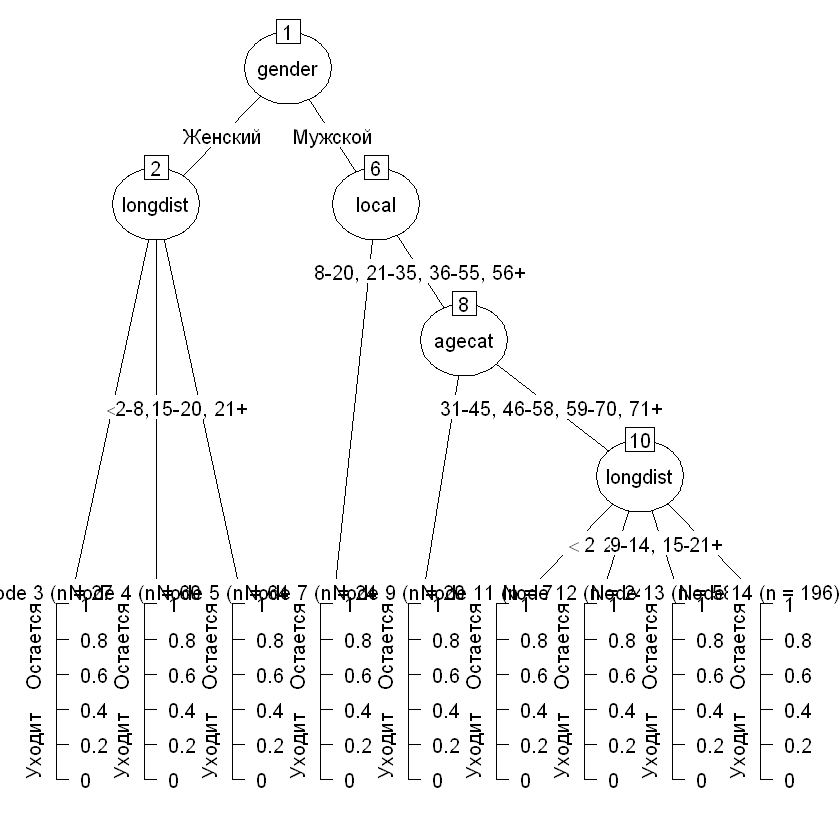

In [65]:
# выводим диаграмму дерева
plot(chd)

In [66]:
# выводим диаграмму дерева
# в схематичном виде
print(chd)


Model formula:
churn ~ longdist + local + int_disc + billtype + pay + gender + 
    marital + income + agecat

Fitted party:
[1] root
|   [2] gender in Женский
|   |   [3] longdist <2: Уходит (n = 279, err = 7.9%)
|   |   [4] longdist in 2-8, 9-14: Уходит (n = 608, err = 34.4%)
|   |   [5] longdist in 15-20, 21+: Уходит (n = 644, err = 42.7%)
|   [6] gender in Мужской
|   |   [7] local <8: Уходит (n = 248, err = 44.4%)
|   |   [8] local in 8-20, 21-35, 36-55, 56+
|   |   |   [9] agecat <31: Остается (n = 205, err = 31.2%)
|   |   |   [10] agecat in 31-45, 46-58, 59-70, 71+
|   |   |   |   [11] longdist <2: Остается (n = 70, err = 4.3%)
|   |   |   |   [12] longdist in 2-8: Остается (n = 248, err = 13.3%)
|   |   |   |   [13] longdist in 9-14, 15-20: Остается (n = 582, err = 7.4%)
|   |   |   |   [14] longdist in 21+: Остается (n = 196, err = 14.3%)

Number of inner nodes:    5
Number of terminal nodes: 9


## 2.3.2 Получение прогнозов модели

In [67]:
# выводим спрогнозированные вероятности отрицательного
# класса для первых 10 наблюдений
# контрольной выборки
prob_hold <- predict(chd, holdout, type="prob")
prob_hold[1:10]

[1] 0.44354839 0.44354839 0.44354839 0.07885305 0.07885305 0.44354839
 [7] 0.07885305 0.44354839 0.44354839 0.44354839

In [68]:
# округляем спрогнозированные вероятности
# до второго десятичного знака
round(prob_hold[1:10], 2)

[1] 0.44 0.44 0.44 0.08 0.08 0.44 0.08 0.44 0.44 0.44

In [69]:
# извлекаем правила разбиения,
# полученные нашей моделью
library(partykit)
treetable <- function(party_tree) {
  
  df_list <- list()
  var_names <-  attr(party_tree$terms, "term.labels")
  var_levels <- lapply(party_tree$data, levels)
  
  walk_the_tree <- function(node, rule_branch = NULL) {
    # проходим структуру разбиений дерева (рекурсивная функция)
    # извлекаем правила для каждой ветви
    if(missing(rule_branch)) {
      rule_branch <- setNames(data.frame(t(replicate(length(var_names), NA))), var_names)
      rule_branch <- cbind(rule_branch, nodeId = NA)
      rule_branch <- cbind(rule_branch, predict = NA)
    }
    if(is.terminal(node)) {
      rule_branch[["nodeId"]] <- node$id
      rule_branch[["predict"]] <- predict_party(party_tree, node$id, type="prob") 
      
      
      df_list[[as.character(node$id)]] <<- rule_branch
    } else {
      for(i in 1:length(node)) {
        rule_branch1 <- rule_branch
        val1 <- decision_rule(node,i)
        rule_branch1[[names(val1)[1]]] <- val1
        walk_the_tree(node[i], rule_branch1)
      }
    }
  }
  
  decision_rule <- function(node, i) {
    # возвращаем правила разбиения в датафрейм вместе 
    # с названиями переменных и значениями
    var_name <- var_names[node$split$varid[[1]]]
    values_vec <- var_levels[[var_name]][ node$split$index == i]
    values_txt <- paste(values_vec, collapse = ", ")
    return( setNames(values_txt, var_name))
  }
  walk_the_tree(party_tree$node)
  res_table <- Reduce(rbind, df_list)
  return(res_table)
}

table <- treetable(chd)

In [70]:
print(table)

     longdist                   local int_disc billtype pay  gender marital
1          <2                    <NA>       NA       NA  NA Женский      NA
2   2-8, 9-14                    <NA>       NA       NA  NA Женский      NA
3  15-20, 21+                    <NA>       NA       NA  NA Женский      NA
4        <NA>                      <8       NA       NA  NA Мужской      NA
5        <NA> 8-20, 21-35, 36-55, 56+       NA       NA  NA Мужской      NA
6          <2 8-20, 21-35, 36-55, 56+       NA       NA  NA Мужской      NA
7         2-8 8-20, 21-35, 36-55, 56+       NA       NA  NA Мужской      NA
8 9-14, 15-20 8-20, 21-35, 36-55, 56+       NA       NA  NA Мужской      NA
9         21+ 8-20, 21-35, 36-55, 56+       NA       NA  NA Мужской      NA
  income                   agecat nodeId predict.Остается predict.Уходит
1     NA                     <NA>      3       0.07885305     0.92114695
2     NA                     <NA>      4       0.34375000     0.65625000
3     NA             

In [71]:
# задаем стартовое значение генератора
# случайных чисел для воспроизводимости
set.seed(42)

# выводим спрогнозированные классы
# для первых 10 наблюдений
# контрольной выборки
predvalue_hold <- predict(chd, holdout, type="response")
predvalue_hold[1:10]


3      8     14     18     22     25     35     37     38     43 
Уходит Уходит Уходит Уходит Уходит Уходит Уходит Уходит Уходит Уходит 
Levels: Остается Уходит

In [72]:
# строим таблицу классификации
table(holdout$churn, predvalue_hold)

          predvalue_hold
           Остается Уходит
  Остается      464    282
  Уходит         73    525

## 2.3.3 Работа с матрицей ошибок

In [73]:
# снижаем пороговое значение спрогнозированной
# вероятности положительного класса до 0.3
table(holdout$churn == "Уходит", predict(chd, 
                                         holdout, type="prob")[,"Уходит"] >= 0.30)

       
        FALSE TRUE
  FALSE   413  333
  TRUE     49  549

In [74]:
# повышаем пороговое значение спрогнозированной
# вероятности положительного класса до 0.7
table(holdout$churn == "Уходит", predict(chd, 
                                         holdout, type="prob")[,"Уходит"] >= 0.70)

       
        FALSE TRUE
  FALSE   729   17
  TRUE    492  106

## 2.3.4 Знакомство с ROC-кривой и AUC

In [75]:
# создаем вектор фактических значений (классов)
# зависимой переменной
cls = c('P', 'P', 'P', 'N', 'P', 'P', 'N', 'P', 'P', 'N', 'N',
        'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'N')

In [76]:
# создаем вектор спрогнозированных вероятностей 
# положительного класса
score = c(0.92, 0.9, 0.88, 0.85, 0.82, 0.79, 0.75, 0.73, 0.72, 0.7, 0.6, 
          0.59, 0.58, 0.53, 0.52, 0.4, 0.33, 0.32, 0.24, 0.18)

In [77]:
# записываем положительные
# и отрицательные примеры 
pos = score[cls == 'P']
neg = score[cls == 'N']

In [78]:
# задаем стартовое значение генератора
# случайных чисел для воспроизводимости
set.seed(14)

# извлекаем случайным образом положительные и  
# отрицательные примеры и вычисляем долю случаев, 
# когда положительные примеры получили более 
# высокий ранг, чем отрицательные примеры
p = replicate(200000, sample(pos, size=1) > sample(neg, size=1))
mean(p)

[1] 0.864645

In [79]:
# разделим вероятности на 2 
score_divided_by_2 = c(0.92, 0.9, 0.88, 0.85, 0.82, 0.79, 0.75, 0.73, 0.72, 0.7, 0.6, 
                       0.59, 0.58, 0.53, 0.52, 0.4, 0.33, 0.32, 0.24, 0.18)/2

score_divided_by_2

[1] 0.460 0.450 0.440 0.425 0.410 0.395 0.375 0.365 0.360 0.350 0.300 0.295
[13] 0.290 0.265 0.260 0.200 0.165 0.160 0.120 0.090

In [80]:
# снова вычисляем AUC как долю случаев, когда
# случайно отобранный положительный объект
# будет проранжирован выше, чем случайно
# отобранный отрицательный 
pos = score_divided_by_2[cls == 'P']
neg = score_divided_by_2[cls == 'N']

set.seed(14)
p = replicate(200000, sample(pos, size=1) > sample(neg, size=1))
mean(p)

[1] 0.864645

In [81]:
# возведем вероятности в квадрат 
score_squared = c(0.92, 0.9, 0.88, 0.85, 0.82, 0.79, 0.75, 0.73, 0.72, 0.7, 0.6, 
                  0.59, 0.58, 0.53, 0.52, 0.4, 0.33, 0.32, 0.24, 0.18)^2

score_squared

[1] 0.8464 0.8100 0.7744 0.7225 0.6724 0.6241 0.5625 0.5329 0.5184 0.4900
[11] 0.3600 0.3481 0.3364 0.2809 0.2704 0.1600 0.1089 0.1024 0.0576 0.0324

In [82]:
# снова вычисляем AUC как долю случаев, когда
# случайно отобранный положительный объект
# будет проранжирован выше, чем случайно
# отобранный отрицательный 
pos = score_squared[cls == 'P']
neg = score_squared[cls == 'N']

set.seed(14)
p = replicate(200000, sample(pos, size=1) > sample(neg, size=1))
mean(p)

[1] 0.864645

In [83]:
# загружаем пакет pROC 
library(pROC)
# автоматически вычисляем AUC 
roc <- roc(cls, score)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [84]:
# выводим информацию о значении AUC
roc


Call:
roc.default(response = cls, predictor = score)

Data: score in 12 controls (cls N) < 8 cases (cls P).
Area under the curve: 0.8646

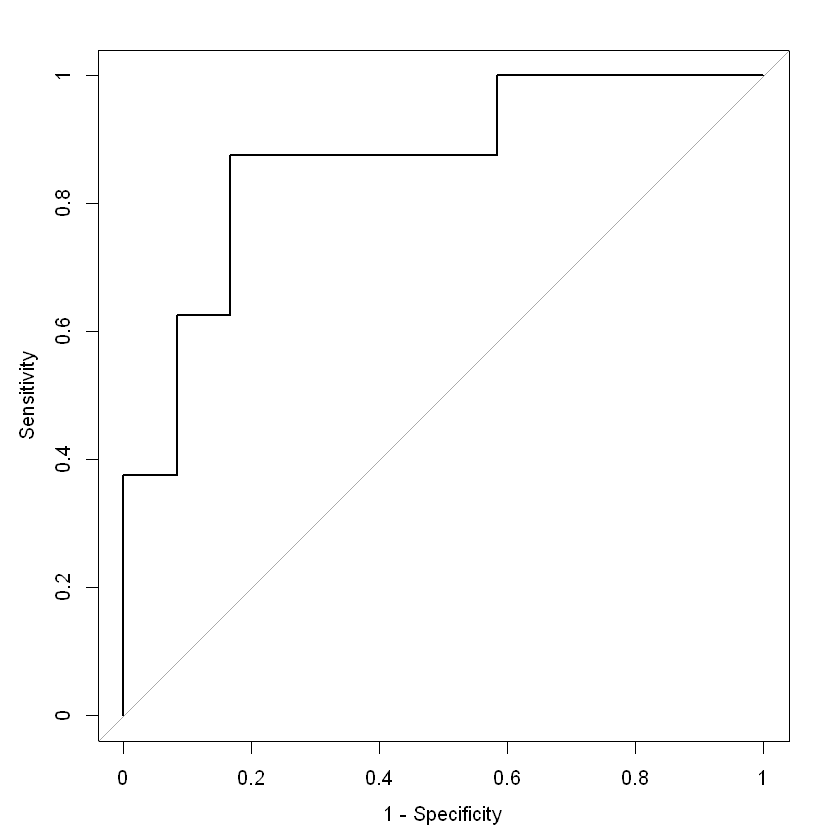

In [85]:
# автоматически строим ROC-кривую
plot.roc(x=roc, legacy.axes=TRUE)

## 2.3.5 Построение ROC-кривой и вычисление AUC для модели

In [86]:
# выводим AUC нашей модели дерева
# для контрольной выборки
roc_hold <- roc(holdout$churn, prob_hold[,2])
roc_hold


Call:
roc.default(response = holdout$churn, predictor = prob_hold[,     2])

Data: prob_hold[, 2] in 746 controls (holdout$churn Остается) < 598 cases (holdout$churn Уходит).
Area under the curve: 0.7875


Call:
roc.default(response = holdout$churn, predictor = prob_hold[,     2])

Data: prob_hold[, 2] in 746 controls (holdout$churn Остается) < 598 cases (holdout$churn Уходит).
Area under the curve: 0.7875

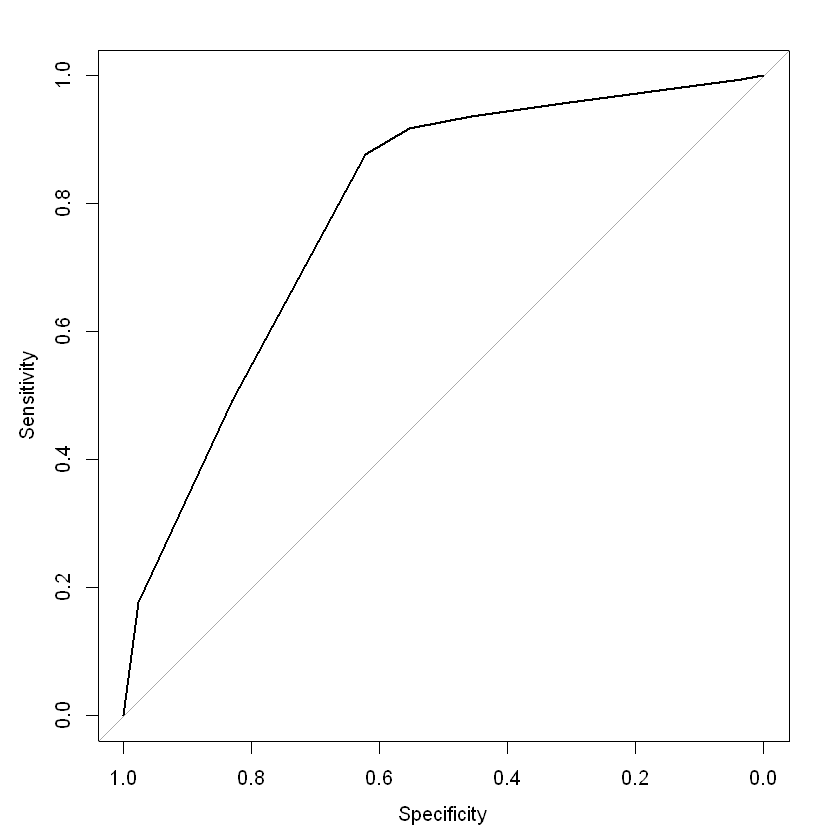

In [87]:
# строим ROC-кривую нашей модели дерева
# для контрольной выборки
roc_hold <- roc(holdout$churn, prob_hold[,2])
roc_hold
plot.roc(roc_hold)

## 2.3.6 Вычисление интервальных оценок AUC для модели

In [88]:
# генеририруем 50 случайных чисел
# в диапазоне от 45 до 100
set.seed(42)
income <- runif(50, min=45, max=100)
income

[1] 95.31433 96.53915 60.73767 90.67462 80.29600 73.55028 85.51236 52.40666
 [9] 81.13458 83.77856 70.17580 84.55117 96.40697 59.04859 70.42611 96.70080
[17] 98.80245 51.46180 71.12484 75.81830 94.72173 52.62906 99.38905 97.06675
[25] 49.53407 73.28165 66.46119 94.81560 69.58333 90.98023 85.56776 89.60803
[33] 66.34596 82.68434 45.21716 90.81038 45.40338 56.42124 94.86308 78.64783
[41] 65.87576 68.96744 47.05871 98.54470 68.74632 97.66671 93.82652 80.19883
[49] 98.40316 79.03610

In [89]:
# вычисляем среднее значение дохода
mean <- mean(income)
mean

[1] 77.93634

In [90]:
# записываем информацию 
# о размере выборки
N <- 50

In [91]:
# вычисляем предел погрешности 
err <- 1.645*(sd(income)/sqrt(N))

In [92]:
# вычисляем нижнюю границу 90%-ного
# доверительного интервала 
mean-err

[1] 74.05113

In [93]:
# вычисляем верхнюю границу 90%-ного
# доверительного интервала 
mean+err

[1] 81.82156

In [94]:
# генерируем данные
set.seed(42)
income <- runif(50, min=45, max=100)
# задаем функцию, вычисляющую среднее
m <- function(x) mean(x)
# создаем вектор, в который будем 
# записывать средние значения, 
# вычисляемые по бутстреп-выборкам
boot <-numeric(5000)
# создаем 5000 бутстреп-выборок и вычисляем
# 5000 средних значений дохода
for (i in 1:5000) boot[i] <- m(sample(income, replace=T))

In [95]:
# вычисляем нижнюю границу 95%-ного
# доверительного интервала
quantile(boot,0.025)

2.5% 
73.28814

In [96]:
# вычисляем верхнюю границу 95%-ного
# доверительного интервала
quantile(boot,0.975)

97.5% 
82.35124

In [97]:
# генерируем данные
set.seed(42)
income <- runif(50, min=45, max=100)
# задаем количество бутстреп-выборок (5000)
B = 5000
# задаем размер бутстреп-выборки, 
# тот же, что и размер исходной
# (50 наблюдений)
n = 50
# создаем матрицу, у которой строки - бустреп-выборки (5000),
# а столбцы - наблюдения, отобранные в бутстреп-выборку с
# возвращением (50)
boot.samples = matrix(sample(income, size = B * n, replace = TRUE), B, n)
# применяем с помощью функции apply нашу функцию mean к каждой
# строке матрицы boot.samples (1 означает строки, 2 - столбцы)
boot.statistics = apply(boot.samples, 1, function(x) mean(x))

In [98]:
# вычисляем нижнюю границу 95%-ного
# доверительного интервала
quantile(boot,0.025)

2.5% 
73.28814

In [99]:
# вычисляем верхнюю границу 95%-ного
# доверительного интервала
quantile(boot,0.975)

97.5% 
82.35124

In [100]:
# вычисляем 95%-ный доверительный интервал AUC 
# по асимптотическому методу Делонга (по умолчанию)
# для модели дерева на контрольной выборке
roc_hold <- roc(holdout$churn, prob_hold[,2], ci=TRUE)
roc_hold


Call:
roc.default(response = holdout$churn, predictor = prob_hold[,     2], ci = TRUE)

Data: prob_hold[, 2] in 746 controls (holdout$churn Остается) < 598 cases (holdout$churn Уходит).
Area under the curve: 0.7875
95% CI: 0.7637-0.8112 (DeLong)

In [101]:
# бутстреп использует рандомизацию, поэтому 
# задаем стартовое значение генератора
# случайных чисел для воспроизводимости
set.seed(14)
# вычисляем 95%-ный доверительный интервал AUC 
# по бутстреп-методу (по умолчанию 2000 бутстреп-
# выборок) для модели дерева на контрольной выборке
ci.auc(roc_hold, method="bootstrap")

95% CI: 0.763-0.8111 (2000 stratified bootstrap replicates)

In [102]:
# задаем стартовое значение генератора
# случайных чисел для воспроизводимости
set.seed(14)
# вычисляем 95%-ный доверительный интервал AUC 
# по бутстреп-методу, увеличиваем количество
# бутстреп-выборок до 5000
ci.auc(roc_hold, method="bootstrap", boot.n=5000)

95% CI: 0.7632-0.811 (5000 stratified bootstrap replicates)

In [103]:
# вычисляем вероятности классов для обучающей
# выборки и записываем в объект prob_dev
prob_dev <- predict(chd, development, type="prob")

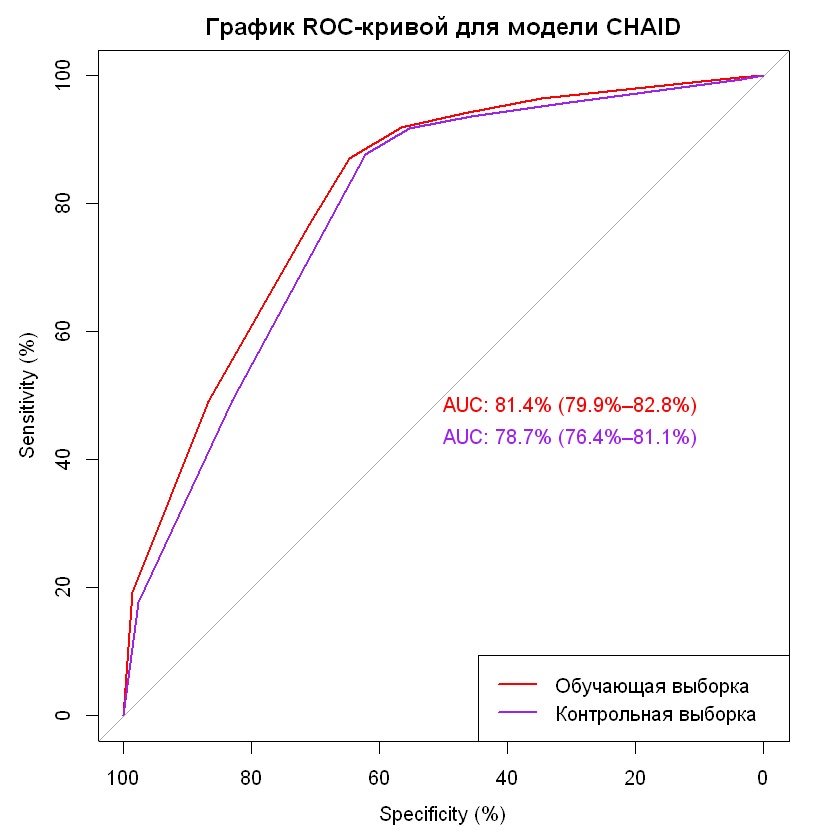

In [104]:
# строим график ROC-кривой для обучающей выборки
roc_dev <-plot.roc(development$churn, prob_dev[,2], 
                   main="График ROC-кривой для модели CHAID",
                   ci=TRUE, percent=TRUE,
                   print.auc=TRUE, col="red")

# добавляем в уже существующий график ROC-кривую
# для контрольной выборки
roc_hold <-plot.roc(holdout$churn, prob_hold[,2], 
                    ci=TRUE, percent=TRUE,
                    print.auc=TRUE, print.auc.x=50, print.auc.y=45, 
                    col="purple", add=TRUE)

# добавляем легенды
legend("bottomright", legend=c("Обучающая выборка", "Контрольная выборка"), 
       col=c("red", "purple"), lwd=2) 

## 2.3.7 Выбор наилучшей модели из нескольких на основе доверительных интервалов AUC

In [105]:
# задаем новые значения параметров
# и строим новую модель
params2 <- chaid_control(minprob = 0.01, minsplit = 500, minbucket = 250)
chd2  <- chaid(churn ~ ., control = params2, development)

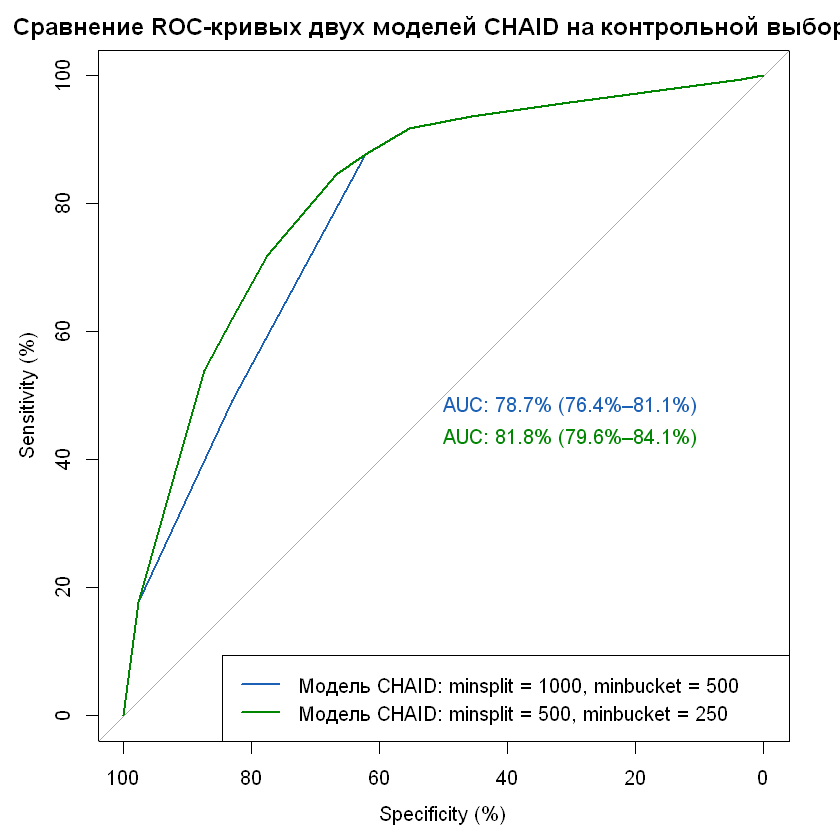

In [106]:
# сравниваем доверительный интервал AUC модели
# со значениями minsplit=1000 и minbucket=500
# и доверительный интервал AUC модели со
# значениями minsplit=500 и minbucket=250
prob_hold2 <- predict(chd2, holdout, type="prob")

roc_hold <-plot.roc(holdout$churn, prob_hold[,2], 
                   main="Сравнение ROC-кривых двух моделей CHAID на контрольной выборке",
                   ci=TRUE, percent=TRUE,
                   print.auc=TRUE, col="#1c61b6")

roc_hold2 <-plot.roc(holdout$churn, prob_hold2[,2], 
                    ci=TRUE, percent=TRUE,
                    print.auc=TRUE, print.auc.x=50, print.auc.y=45, 
                    col="#008600", add=TRUE)

legend("bottomright", legend=c("Модель CHAID: minsplit = 1000, minbucket = 500", 
                               "Модель CHAID: minsplit = 500, minbucket = 250"), 
       col=c("#1c61b6", "#008600"), lwd=2)

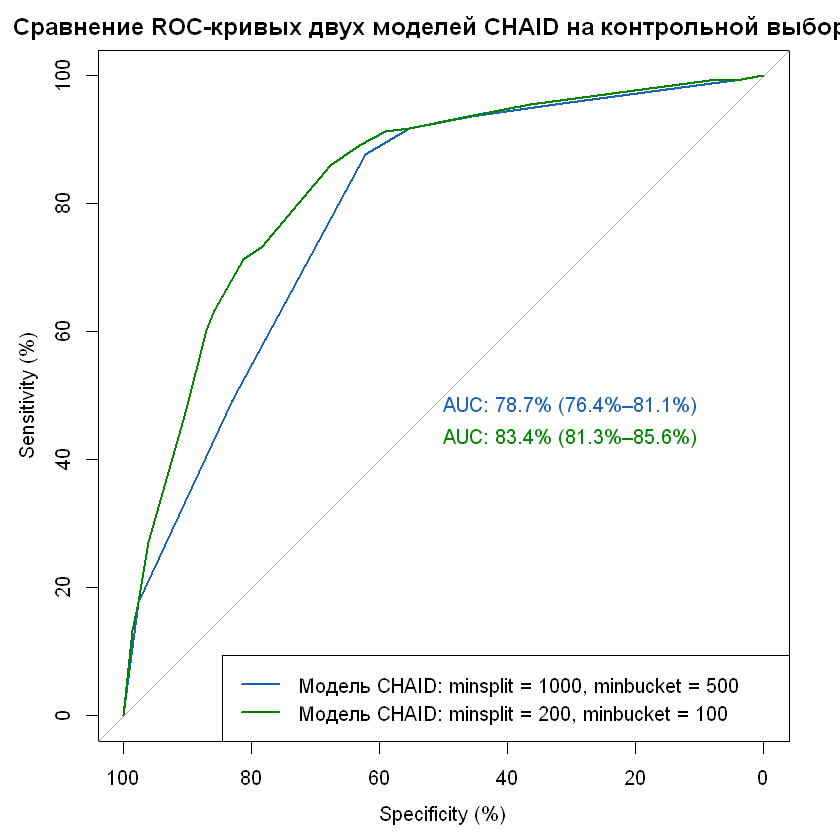

In [107]:
# задаем новые значения параметров
# и строим новую модель
params3 <- chaid_control(minprob = 0.01, minsplit = 200, minbucket = 100)
chd3  <- chaid(churn ~ ., control = params3, development)

# сравниваем доверительный интервал AUC модели
# со значениями minsplit=1000 и minbucket=500
# и доверительный интервал AUC модели со
# значениями minsplit=200 и minbucket=100
prob_hold3 <- predict(chd3, holdout, type="prob")

roc_hold <-plot.roc(holdout$churn, prob_hold[,2], 
                    main="Сравнение ROC-кривых двух моделей CHAID на контрольной выборке",
                    ci=TRUE, percent=TRUE,
                    print.auc=TRUE, col="#1c61b6")

roc_hold3 <-plot.roc(holdout$churn, prob_hold3[,2], 
                     ci=TRUE, percent=TRUE,
                     print.auc=TRUE, print.auc.x=50, print.auc.y=45, 
                     col="#008600", add=TRUE)

legend("bottomright", legend=c("Модель CHAID: minsplit = 1000, minbucket = 500", 
                               "Модель CHAID: minsplit = 200, minbucket = 100"), 
       col=c("#1c61b6", "#008600"), lwd=2)

## 2.3.8 Многократное случайное разбиение на обучающую и контрольную выборки как способ проверки модели

In [108]:
# подготавливаем данные перед выполнением 100-кратного разбиения
# на обучающую и контрольную выборки, при этом импутацию пропусков
# делаем отдельно на каждой итерации внутри цикла
data <- read.csv2("C:/Trees/Churn.csv", sep=";", na.strings="")

data$churn <- as.factor(data$churn)

data <- unique(data)

data$gender <- as.character(data$gender)
data$gender <- gsub("\\&\\*", "", data$gender)
data$gender <- as.factor(data$gender)

data$marital <- as.character(data$marital)
data$marital <- str_replace_all(data$marital, "[^[:alnum:]]", "")
data$marital <- as.factor(data$marital)

data$pay <- recode(data$pay, "'CD'='CC'")

chaid1.auc = NULL
chaid2.auc = NULL
# выполняем 100-кратное разбиение на 
# обучающую и контрольную выборки, на
# каждой из 100 итераций на обучающей
# выборке строим модель, на контрольной
# проверяем ее
set.seed(42)
for (i in 1:100) {
  data$random_number <- runif(nrow(data),0,1)
  development <- data[ which(data$random_number > 0.3), ]
  holdout     <- data[ which(data$random_number <= 0.3), ]
  data$random_number <- NULL
  development$random_number <- NULL
  holdout$random_number <- NULL
  development$income[is.na(development$income)] <- mean(development$income, na.rm=TRUE)
  holdout$income[is.na(holdout$income)] <- mean(development$income, na.rm=TRUE)
  
  values <- compute(development)
  development <- impute(development, object=values)
  holdout <- impute(holdout, object=values)
  
  development$longdist <- ordered(development$longdist, 
                                  levels = c("<2", "2-8", "9-14", "15-20", "21+"))
  development$local <- ordered(development$local, 
                               levels = c("<8", "8-20", "21-35", "36-55", "56+"))
  development$agecat <- ordered(development$agecat, 
                                levels = c("<31", "31-45", "46-58", "59-70", "71+"))
  holdout$longdist <- ordered(holdout$longdist, 
                              levels = c("<2", "2-8", "9-14", "15-20", "21+"))
  holdout$local <- ordered(holdout$local, 
                           levels = c("<8", "8-20", "21-35", "36-55", "56+"))
  holdout$agecat <- ordered(holdout$agecat, 
                            levels = c("<31", "31-45", "46-58", "59-70", "71+"))
  
  development$income <-cut(x=development$income, 
                           breaks=c(-Inf,11000,21000,31000,41000,
                                    50000,59000,69000,80000,
                                    90000,+Inf), 
                           include.lowest=TRUE, 
                           ordered_result=TRUE)
  
  holdout$income <-cut(x=holdout$income, 
                       breaks=c(-Inf,11000,21000,31000,41000,
                                50000,59000,69000,80000,
                                90000,+Inf), 
                       include.lowest=TRUE, 
                       ordered_result=TRUE)
  
  chaid1.model  <- chaid(churn ~ . , 
                        control = chaid_control
                        (minprob = 0.01,
                         minsplit = 1000, minbucket = 500),
                        data=development)
  chaid1.score <- predict(chaid1.model, holdout, type = "prob")
  chaid1.roc <- roc(holdout$churn, chaid1.score[,2])
  chaid1.auc[i] <- chaid1.roc$auc
  
  chaid2.model  <- chaid(churn ~ . , 
                         control = chaid_control
                         (minprob = 0.01,
                          minsplit = 200, minbucket = 100),
                         data=development)
  chaid2.score <- predict(chaid2.model, holdout, type = "prob")
  chaid2.roc <- roc(holdout$churn, chaid2.score[,2])
  chaid2.auc[i] <- chaid2.roc$auc
}

In [109]:
# выводим среднее значение AUC для двух моделей
# на контрольной выборке по результатам 100
# случайных разбиений «обучение-контроль»
results <- c(mean(chaid1.auc), mean(chaid2.auc))
names(results) <- c("Mean AUC minsplit=1000 и minbucket=500", 
                    "Mean AUC minsplit=200 и minbucket=100")
print(results)

Mean AUC minsplit=1000 и minbucket=500  Mean AUC minsplit=200 и minbucket=100 
                             0.8055311                              0.8420523 


In [110]:
# вычисляем 95%-ный доверительный интервал 
# AUC для каждой модели
chaid1.ci = quantile(chaid1.auc, c(.025,.975))
chaid2.ci = quantile(chaid2.auc, c(.025,.975))

results_ci <- list(chaid1.ci, chaid2.ci)
names(results_ci) <- c("95% CI AUC minsplit=1000 и minbucket=500", 
                     "95% CI AUC minsplit=200 и minbucket=100")
print(results_ci)

$`95% CI AUC minsplit=1000 и minbucket=500`
     2.5%     97.5% 
0.7827601 0.8291988 

$`95% CI AUC minsplit=200 и minbucket=100`
     2.5%     97.5% 
0.8249308 0.8576216 



In [111]:
# вычисляем 95%-ный доверительный интервал 
# разницы средних значений AUC
n=100
diff=chaid1.auc-chaid2.auc

lower_limit=mean(diff)-1.96*(sd(diff)/sqrt(n))
upper_limit=mean(diff)+1.96*(sd(diff)/sqrt(n))

results <- list(lower_limit, upper_limit)
names(results) <- c("lower_limit", 
                    "upper_limit")
print(results)

$lower_limit
[1] -0.0385804

$upper_limit
[1] -0.03446199



## 2.3.9 Проверка модели с помощью бутстрепа

In [112]:
# подготавливаем данные перед выполнением бутстрепа
# при этом импутацию пропусков и биннинг делаем 
# отдельно на каждой итерации внутри цикла
data <- read.csv2("C:/Trees/Churn.csv", sep=";", na.strings="")

data$churn <- as.factor(data$churn)

data <- unique(data)

data$gender <- as.character(data$gender)
data$gender <- gsub("\\&\\*", "", data$gender)
data$gender <- as.factor(data$gender)

data$marital <- as.character(data$marital)
data$marital <- str_replace_all(data$marital, "[^[:alnum:]]", "")
data$marital <- as.factor(data$marital)

data$pay <- recode(data$pay, "'CD'='CC'")

set.seed(42)
data$random_number <- runif(nrow(data),0,1)
development <- data[ which(data$random_number > 0.3), ]
holdout     <- data[ which(data$random_number <= 0.3), ]
data$random_number <- NULL
development$random_number <- NULL
holdout$random_number <- NULL

# задаем количество бутстреп-выборок
R = 100
# задаем количество элементов для
# обучающих бутстреп-выборок
k = nrow(development)
# задаем количество элементов для
# контрольных бутстреп-выборок
n = nrow(holdout)

chaid1.auc_boot = NULL
chaid2.auc_boot = NULL

# выполняем бутстреп, на каждой итерации 
# формируем на основе исходной обучающей выборки 
# бутстреп-выборку, формируем на основе исходной
# контрольной выборки бутстреп-выборку, строим модель 
# по бутстреп-выборке, сгенерированной на основе 
# исходной обучающей выборки, проверяем ее на 
# бутстреп-выборке, сгенерированной на основе 
# исходной контрольной выборки
set.seed(701)
for(i in 1:R){
  
  obs_dev.boot <- sample(x = 1:k, size = k, replace = T)
  development.boot <- development[obs_dev.boot, ]
  
  # на обучающей бутстреп-выборке вычисляем статистики для импутации, 
  # с помощью этих статистик заменяем пропуски в обучающей 
  # бутстреп-выборке
  development.boot$income[is.na(development.boot$income)] <- mean(development.boot$income,
                                                                  na.rm=TRUE)
  mean <- mean(development.boot$income, na.rm=TRUE)
  
  values <- compute(development.boot)
  development.boot <- impute(development.boot, object=values)
  
  development.boot$longdist <- ordered(development.boot$longdist, 
                                  levels = c("<2", "2-8", "9-14", "15-20", "21+"))
  development.boot$local <- ordered(development.boot$local, 
                               levels = c("<8", "8-20", "21-35", "36-55", "56+"))
  development.boot$agecat <- ordered(development.boot$agecat, 
                                levels = c("<31", "31-45", "46-58", "59-70", "71+"))
  
  development.boot$income <-cut(x=development.boot$income, 
                           breaks=c(-Inf,11000,21000,31000,41000,
                                    50000,59000,69000,80000,
                                    90000,+Inf), 
                           include.lowest=TRUE, 
                           ordered_result=TRUE)
  
  obs_hold.boot <- sample(x = 1:n, size = n, replace = T)
  holdout.boot <- holdout[obs_hold.boot, ]
  
  # пропуски в контрольной бутстреп-выборке заменяем статистиками,
  # вычисленными на обучающей бутстреп-выборке
  holdout.boot$income[is.na(holdout.boot$income)] <- mean
  holdout.boot <- impute(holdout.boot, object=values)
  
  holdout.boot$longdist <- ordered(holdout.boot$longdist, 
                              levels = c("<2", "2-8", "9-14", "15-20", "21+"))
  holdout.boot$local <- ordered(holdout.boot$local, 
                           levels = c("<8", "8-20", "21-35", "36-55", "56+"))
  holdout.boot$agecat <- ordered(holdout.boot$agecat, 
                            levels = c("<31", "31-45", "46-58", "59-70", "71+"))
  
  holdout.boot$income <-cut(x=holdout.boot$income, 
                       breaks=c(-Inf,11000,21000,31000,41000,
                                50000,59000,69000,80000,
                                90000,+Inf), 
                       include.lowest=TRUE, 
                       ordered_result=TRUE)

  chaid1 <- chaid(churn ~ . , 
                  control = chaid_control
                  (minprob = 0.01,
                    minsplit = 1000, minbucket = 500),
                  data=development.boot)
  
  chaid2 <- chaid(churn ~ . , 
                  control = chaid_control
                  (minprob = 0.01,
                    minsplit = 200, minbucket = 100),
                  data=development.boot)
    
  chaid1.score_boot <- predict(chaid1, holdout.boot, type = "prob")
  chaid1.roc_boot <- roc(holdout.boot$churn, chaid1.score_boot[,2])
  chaid1.auc_boot[i] <- chaid1.roc_boot$auc
  
  chaid2.score_boot <- predict(chaid2, holdout.boot, type = "prob")
  chaid2.roc_boot <- roc(holdout.boot$churn, chaid2.score_boot[,2])
  chaid2.auc_boot[i] <- chaid2.roc_boot$auc  
  
}

In [113]:
# вычисляем бутстрепированный 95%-ный доверительный интервал 
# AUC для каждой модели
chaid1.ci = quantile(chaid1.auc_boot,c(.025,.975))
chaid2.ci = quantile(chaid2.auc_boot,c(.025,.975))

results <- list(chaid1.ci, chaid2.ci)
names(results) <- c("bootstrapped 95% CI AUC minsplit=1000 и minbucket=500", 
                    "bootstrapped 95% CI AUC minsplit=200 и minbucket=100")
print(results)

$`bootstrapped 95% CI AUC minsplit=1000 и minbucket=500`
     2.5%     97.5% 
0.7632211 0.8219718 

$`bootstrapped 95% CI AUC minsplit=200 и minbucket=100`
     2.5%     97.5% 
0.8075516 0.8529439 



In [114]:
# вычисляем 95%-ный доверительный интервал 
# разницы средних значений AUC
n=100
d=chaid1.auc_boot-chaid2.auc_boot

low_limit=mean(d)-1.96*(sd(d)/sqrt(n))
up_limit=mean(d)+1.96*(sd(d)/sqrt(n))

results <- list(low_limit, up_limit)
names(results) <- c("lower_limit", 
                    "upper_limit")
print(results)

$lower_limit
[1] -0.0395576

$upper_limit
[1] -0.03426119



In [115]:
# вычисляем 95%-ный доверительный интервал 
# разницы вычисленных значений AUC
ci = quantile(d, c(.025,.975))
print(ci)

       2.5%       97.5% 
-0.05801135 -0.01297528 


In [116]:
# выполняем тест Уилкоксона для связанных выборок
options(scipen=999)
wilcox.test(chaid1.auc_boot, chaid2.auc_boot, paired=TRUE)


	Wilcoxon signed rank test with continuity correction

data:  chaid1.auc_boot and chaid2.auc_boot
V = 0, p-value < 0.00000000000000022
alternative hypothesis: true location shift is not equal to 0


## 2.3.10 Перекрестная проверка как способ проверки модели

In [117]:
# подготавливаем данные перед выполнением перекрестной проверки,
# при этом импутацию пропусков и биннинг делаем отдельно на
# каждой итерации внутри цикла
data <- read.csv2("C:/Trees/Churn.csv", sep=";", na.strings="")
data$churn <- as.factor(data$churn)

data <- unique(data)

data$gender <- as.character(data$gender)
data$gender <- gsub("\\&\\*", "", data$gender)
data$gender <- as.factor(data$gender)

data$marital <- as.character(data$marital)
data$marital <- str_replace_all(data$marital, "[^[:alnum:]]", "")
data$marital <- as.factor(data$marital)

data$pay <- recode(data$pay, "'CD'='CC'")

set.seed(42)
index <- sample(1:10,nrow(data),replace=TRUE)
folds <- 1:10

chaid1_cv1.auc = NULL
chaid2_cv1.auc = NULL

# выполняем перекрестную проверку
for (i in 1:10){  
  development = subset(data, index %in% folds[-i])
  holdout = subset(data, index %in% c(i))
  
  # на каждом проходе перекрестной проверки отдельно вычисляем 
  # статистики по обучающим блокам и заменяем ими пропуски в 
  # обучающих блоках, затем отдельно вычисляем статистики 
  # на контрольном блоке и заменяем ими пропуски 
  # в контрольном блоке
  development$income[is.na(development$income)] <- mean(development$income, na.rm=TRUE)
  holdout$income[is.na(holdout$income)] <- mean(holdout$income, na.rm=TRUE)
  development <- impute(development, method = "median/mode")
  holdout <- impute(holdout, method = "median/mode")
  
  development$longdist <- ordered(development$longdist, 
                                  levels = c("<2", "2-8", "9-14", "15-20", "21+"))
  development$local <- ordered(development$local, 
                               levels = c("<8", "8-20", "21-35", "36-55", "56+"))
  development$agecat <- ordered(development$agecat, 
                                levels = c("<31", "31-45", "46-58", "59-70", "71+"))
  holdout$longdist <- ordered(holdout$longdist, 
                              levels = c("<2", "2-8", "9-14", "15-20", "21+"))
  holdout$local <- ordered(holdout$local, 
                           levels = c("<8", "8-20", "21-35", "36-55", "56+"))
  holdout$agecat <- ordered(holdout$agecat, 
                            levels = c("<31", "31-45", "46-58", "59-70", "71+"))
  
  development$income <-cut(x=development$income, 
                           breaks=c(-Inf,11000,21000,31000,41000,
                                    50000,59000,69000,80000,
                                    90000,+Inf), 
                           include.lowest=TRUE, 
                           ordered_result=TRUE)
  
  holdout$income <-cut(x=holdout$income, 
                       breaks=c(-Inf,11000,21000,31000,41000,
                                50000,59000,69000,80000,
                                90000,+Inf), 
                       include.lowest=TRUE, 
                       ordered_result=TRUE)
  
  chaid1_cv1.model  <- chaid(churn ~ . , 
                         control = chaid_control
                         (minprob = 0.01,
                           minsplit = 1000, minbucket = 500),
                         data=development)
  chaid1_cv1.score <- predict(chaid1_cv1.model, holdout, type = "prob")
  chaid1_cv1.roc <- roc(holdout$churn, chaid1_cv1.score[,2])
  chaid1_cv1.auc[i] <- chaid1_cv1.roc$auc
  
  chaid2_cv1.model  <- chaid(churn ~ . , 
                         control = chaid_control
                         (minprob = 0.01,
                           minsplit = 200, minbucket = 100),
                         data=development)
  chaid2_cv1.score <- predict(chaid2_cv1.model, holdout, type = "prob")
  chaid2_cv1.roc <- roc(holdout$churn, chaid2_cv1.score[,2])
  chaid2_cv1.auc[i] <- chaid2_cv1.roc$auc  
}

In [118]:
# смотрим оценки AUC обеих моделей, усредненные по 10
# контрольным блокам перекрестной проверки
results <- c(mean(chaid1_cv1.auc), mean(chaid2_cv1.auc))
names(results) <- c("Mean AUC cv minsplit=1000 и minbucket=500", 
                    "Mean AUC cv minsplit=200 и minbucket=100")
print(results)

Mean AUC cv minsplit=1000 и minbucket=500 
                                 0.810431 
 Mean AUC cv minsplit=200 и minbucket=100 
                                 0.842140 


In [119]:
chaid1_cv2.auc = NULL
chaid2_cv2.auc = NULL

# выполняем перекрестную проверку
for (i in 1:10){  
  development = subset(data, index %in% folds[-i])
  holdout = subset(data, index %in% c(i))

  # в каждом проходе перекрестной проверки 
  # вычисляем статистики на обучающих блоках 
  # и заменяем ими пропуски как в обучающих блоках, 
  # так и в контрольном блоке
  development$income[is.na(development$income)] <- mean(development$income, na.rm=TRUE)
  holdout$income[is.na(holdout$income)] <- mean(development$income, na.rm=TRUE)
  values <- compute(development)
  development <- impute(development, object=values)
  holdout <- impute(holdout, object=values)
  
  development$longdist <- ordered(development$longdist, 
                                  levels = c("<2", "2-8", "9-14", "15-20", "21+"))
  development$local <- ordered(development$local, 
                               levels = c("<8", "8-20", "21-35", "36-55", "56+"))
  development$agecat <- ordered(development$agecat, 
                                levels = c("<31", "31-45", "46-58", "59-70", "71+"))
  holdout$longdist <- ordered(holdout$longdist, 
                              levels = c("<2", "2-8", "9-14", "15-20", "21+"))
  holdout$local <- ordered(holdout$local, 
                           levels = c("<8", "8-20", "21-35", "36-55", "56+"))
  holdout$agecat <- ordered(holdout$agecat, 
                            levels = c("<31", "31-45", "46-58", "59-70", "71+"))
  
  development$income <-cut(x=development$income, 
                           breaks=c(-Inf,11000,21000,31000,41000,
                                    50000,59000,69000,80000,
                                    90000,+Inf), 
                           include.lowest=TRUE, 
                           ordered_result=TRUE)
  
  holdout$income <-cut(x=holdout$income, 
                       breaks=c(-Inf,11000,21000,31000,41000,
                                50000,59000,69000,80000,
                                90000,+Inf), 
                       include.lowest=TRUE, 
                       ordered_result=TRUE)
  
  chaid1_cv2.model  <- chaid(churn ~ . , 
                         control = chaid_control
                         (minprob = 0.01,
                           minsplit = 1000, minbucket = 500),
                         data=development)
  chaid1_cv2.score <- predict(chaid1_cv2.model, holdout, type = "prob")
  chaid1_cv2.roc <- roc(holdout$churn, chaid1_cv2.score[,2])
  chaid1_cv2.auc[i] <- chaid1_cv2.roc$auc
  
  chaid2_cv2.model  <- chaid(churn ~ . , 
                         control = chaid_control
                         (minprob = 0.01,
                           minsplit = 200, minbucket = 100),
                         data=development)
  chaid2_cv2.score <- predict(chaid2_cv2.model, holdout, type = "prob")
  chaid2_cv2.roc <- roc(holdout$churn, chaid2_cv2.score[,2])
  chaid2_cv2.auc[i] <- chaid2_cv2.roc$auc  
}

In [120]:
# смотрим оценки AUC обеих моделей, усредненные по 10
# контрольным блокам перекрестной проверки
results <- c(mean(chaid1_cv2.auc), mean(chaid2_cv2.auc))
names(results) <- c("Mean AUC cv minsplit=1000 и minbucket=500", 
                    "Mean AUC cv minsplit=200 и minbucket=100")
print(results)

Mean AUC cv minsplit=1000 и minbucket=500 
                                0.8104736 
 Mean AUC cv minsplit=200 и minbucket=100 
                                0.8422692 


## 2.3.11 Однократное случайное разбиение на обучающую, контрольную и тестовую выборки как наилучший способ проверки модели

In [121]:
# выполняем преобразования, которые можно осуществить 
# до разбиения на обучающую, контрольную и
# тестовую выборки
data <- read.csv2("C:/Trees/Churn.csv", sep=";", na.strings="")
data$churn <- as.factor(data$churn)

data <- unique(data)

data$gender <- as.character(data$gender)
data$gender <- gsub("\\&\\*", "", data$gender)
data$gender <- as.factor(data$gender)

data$marital <- as.character(data$marital)
data$marital <- str_replace_all(data$marital, "[^[:alnum:]]", "")
data$marital <- as.factor(data$marital)

data$pay <- recode(data$pay, "'CD'='CC'")

In [122]:
# задаем процентные доли обучающей, 
# контрольной и тестовой выборок
fractionTraining   <- 0.60
fractionValidation <- 0.20
fractionTest       <- 0.20

In [123]:
# вычисляем размеры выборок
sampleSizeTraining   <- floor(fractionTraining   * nrow(data))
sampleSizeValidation <- floor(fractionValidation * nrow(data))
sampleSizeTest       <- floor(fractionTest       * nrow(data))

In [124]:
# присваиваем индексы
indicesTraining    <- sort(sample(seq_len(nrow(data)), size=sampleSizeTraining))
indicesNotTraining <- setdiff(seq_len(nrow(data)), indicesTraining)
indicesValidation  <- sort(sample(indicesNotTraining, size=sampleSizeValidation))
indicesTest        <- setdiff(indicesNotTraining, indicesValidation)

In [125]:
# формируеи обучающую, контрольную
# и тестовую выборки
Training   <- data[indicesTraining, ]
Validation <- data[indicesValidation, ]
Test       <- data[indicesTest, ]

In [126]:
# смотрим количество наблюдений в каждой выборке
results <- c(nrow(Training), nrow(Validation), nrow(Test))
names(results) <- c("Training", "Validation", "Test")
print(results)

  Training Validation       Test 
      2654        884        886 


In [127]:
# взглянем на распределение классов зависимой переменной
# churn в обучающей, контрольной и тестовой выборках
myList <- list(Training, Validation, Test)
print(lapply(myList, function(x) summary(x[,10])))

[[1]]
   0    1 
1506 1148 

[[2]]
  0   1 
514 370 

[[3]]
  0   1 
472 414 



In [128]:
# осуществляем преобразования, которые нужно выполнять
# после разбиения на обучающую, контрольную и тестовую
# выборки 
Training$income[is.na(Training$income)] <- mean(Training$income, na.rm=TRUE)
Validation$income[is.na(Validation$income)] <- mean(Validation$income, na.rm=TRUE)
Test$income[is.na(Test$income)] <- mean(Test$income, na.rm=TRUE)

Training <- impute(Training, method = "median/mode")
Validation <- impute(Validation, method = "median/mode")
Test <- impute(Test, method = "median/mode")


Training$longdist <- ordered(Training$longdist, 
                             levels = c("<2", "2-8", "9-14", "15-20", "21+"))
Training$local <- ordered(Training$local, 
                          levels = c("<8", "8-20", "21-35", "36-55", "56+"))
Training$agecat <- ordered(Training$agecat, 
                           levels = c("<31", "31-45", "46-58", "59-70", "71+"))
Validation$longdist <- ordered(Validation$longdist, 
                               levels = c("<2", "2-8", "9-14", "15-20", "21+"))
Validation$local <- ordered(Validation$local, 
                            levels = c("<8", "8-20", "21-35", "36-55", "56+"))
Validation$agecat <- ordered(Validation$agecat, 
                             levels = c("<31", "31-45", "46-58", "59-70", "71+"))
Test$longdist <- ordered(Test$longdist, 
                         levels = c("<2", "2-8", "9-14", "15-20", "21+"))
Test$local <- ordered(Test$local, 
                      levels = c("<8", "8-20", "21-35", "36-55", "56+"))
Test$agecat <- ordered(Test$agecat, 
                       levels = c("<31", "31-45", "46-58", "59-70", "71+"))

Training$income <-cut(x=Training$income, 
                       breaks=c(-Inf,11000,21000,31000,41000,
                                50000,59000,69000,80000,
                                90000,+Inf), 
                       include.lowest=TRUE, 
                       ordered_result=TRUE)
Validation$income <-cut(x=Validation$income, 
                       breaks=c(-Inf,11000,21000,31000,41000,
                                50000,59000,69000,80000,
                                90000,+Inf), 
                       include.lowest=TRUE, 
                       ordered_result=TRUE)
Test$income <-cut(x=Test$income, 
                       breaks=c(-Inf,11000,21000,31000,41000,
                                50000,59000,69000,80000,
                                90000,+Inf), 
                       include.lowest=TRUE, 
                       ordered_result=TRUE)

In [129]:
# строим модели с разными комбинациями значений 
# параметров на обучающей выборке
chd1  <- chaid(churn ~ . , control = chaid_control
               (minprob = 0.01,
                 minsplit = 1000, minbucket = 500),
               data=Training)

chd1_score <- predict(chd1, Validation, type = "prob")
chd1_ci.auc <- ci.auc(Validation$churn, chd1_score[,2])

chd2  <- chaid(churn ~ . , control = chaid_control
               (minprob = 0.01,
                 minsplit = 200, minbucket = 100),
               data=Training)

chd2_score <- predict(chd2, Validation, type = "prob")
chd2_ci.auc <- ci.auc(Validation$churn, chd2_score[,2])

In [130]:
# смотрим доверительные интервалы AUC
# моделей на контрольной выборке
results <- list(chd1_ci.auc, chd2_ci.auc)
names(results) <- c("95% CI AUC minsplit=1000 и minbucket=500", 
                    "95% CI AUC minsplit=200 и minbucket=100")
print(results)

$`95% CI AUC minsplit=1000 и minbucket=500`
95% CI: 0.7797-0.8344 (DeLong)

$`95% CI AUC minsplit=200 и minbucket=100`
95% CI: 0.8274-0.8774 (DeLong)



In [131]:
# проверяем качество наилучшей модели
# на тестовой выборке
chd2_test_score <- predict(chd2, Test, type = "prob")
chd2_test_ci.auc <- ci.auc(Test$churn, chd2_test_score[,2])
chd2_test_ci.auc

95% CI: 0.8053-0.8583 (DeLong)

In [132]:
# объединяем обучающую, контрольную
# и тестовые выборки
TrainValTest <- rbind(Training, Validation, Test)

In [133]:
# строим модель с наилучшей комбинацией 
# параметров на объединенных данных
chd_best  <- chaid(churn ~ . , control = chaid_control
                   (minprob = 0.01,
                     minsplit = 200, minbucket = 100),
                   data= TrainValTest)

## 2.3.12 Применение модели к новым данным

In [134]:
# загружаем новые данные
newdata <- read.csv2("C:/Trees/Churn_new.csv", sep=";", na.strings="")

In [135]:
# смотрим типы переменных
str(newdata)

'data.frame':	64 obs. of  9 variables:
 $ longdist: Factor w/ 5 levels "<2","15-20","2-8",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ local   : Factor w/ 5 levels "<8","21-35","36-55",..: 1 1 1 1 1 1 1 1 1 3 ...
 $ int_disc: Factor w/ 2 levels "Да","Нет": 2 2 2 2 2 2 2 2 1 2 ...
 $ billtype: Factor w/ 2 levels "Бесплатный","Бюджетный": 2 1 1 1 1 1 2 1 1 1 ...
 $ pay     : Factor w/ 3 levels "Auto","CC","CH": 2 2 2 3 1 1 2 1 3 2 ...
 $ gender  : Factor w/ 2 levels "Женский","Мужской": 2 2 2 2 2 1 2 2 2 1 ...
 $ marital : Factor w/ 2 levels "Женат","Одинокий": 1 1 1 2 2 2 1 2 2 1 ...
 $ income  : num  55978 48714 16786 94160 47750 ...
 $ agecat  : Factor w/ 5 levels "<31","31-45",..: 1 1 1 1 1 1 1 1 1 1 ...


In [136]:
# проверяем наличие новых категорий, которые
# отсутствуют в обучающей выборке
lapply(newdata[sapply(newdata, is.factor)], 
       function(x) summary(x))

$longdist
   <2 15-20   2-8   21+  9-14 
   12    25    11     5    11 

$local
   <8 21-35 36-55   56+  8-20  NA's 
   10     6    16     4    26     2 

$int_disc
 Да Нет 
 15  49 

$billtype
Бесплатный  Бюджетный 
        28         36 

$pay
Auto   CC   CH 
  17   38    9 

$gender
Женский Мужской 
     27      37 

$marital
   Женат Одинокий 
      26       38 

$agecat
  <31 31-45 46-58 59-70   71+ 
   32    12     8     1    11

In [137]:
# проверяем наличие пропусков
sapply(newdata, function(x) sum(is.na(x)))

longdist    local int_disc billtype      pay   gender  marital   income 
       0        2        0        0        0        0        0        2 
  agecat 
       0

In [138]:
# импутируем пропуски
newdata$income[is.na(newdata$income)] <- mean(newdata$income, na.rm=TRUE)
newdata <- impute(newdata, method = "median/mode")

In [139]:
# преобразовываем переменные longdist, local, 
# agecat в упорядоченные факторы
newdata$longdist <- ordered(newdata$longdist, 
                                levels = c("<2", "2-8", "9-14", "15-20", "21+"))
newdata$local <- ordered(newdata$local, 
                             levels = c("<8", "8-20", "21-35", "36-55", "56+"))
newdata$agecat <- ordered(newdata$agecat, 
                              levels = c("<31", "31-45", "46-58", "59-70", "71+"))

In [140]:
# выполняем биннинг переменной income
newdata$income <-cut(x=newdata$income, 
                         breaks=c(-Inf,11500,21000,32000,42000,
                                  50000,59000,69000,81000,
                                  91000,+Inf), 
                                include.lowest=TRUE, 
                                ordered_result=TRUE)

In [141]:
# вычисляем вероятности для новых данных
newdata_score <- predict(chd_best, newdata, type="prob")

In [142]:
# записываем датафрейм results, содержащий 
# новые данные и вычисленные вероятности
results <-data.frame(newdata, result=newdata_score)

In [143]:
# записываем на основе датафрейма results
# одноименный CSV-файл
write.csv(results, "C:/Trees/Temp/results.csv")

In [144]:
# записываем на основе датафрейма results
# одноименный XLS-файл
library(xlsx)
library(rJava)
write.xlsx2(results, "C:/Trees/Temp/results.xlsx")

Warning message:
"package 'xlsx' was built under R version 3.4.3"Loading required package: rJava
Loading required package: xlsxjars
